In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [20]:
np.random.seed(7)

In [21]:
data = pd.read_csv('DatosFinales.csv', usecols = [3],engine = 'python')
dataset = data.values
dataset = dataset.astype('float32')
dataset

array([[4.37],
       [5.71],
       [7.76],
       ...,
       [0.1 ],
       [0.18],
       [0.28]], dtype=float32)

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
dataset = scaler.fit_transform(dataset)
dataset

array([[0.05470706],
       [0.07148223],
       [0.09714572],
       ...,
       [0.00125188],
       [0.00225338],
       [0.00350526]], dtype=float32)

In [24]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
len(train),len(test),train,test

(36823,
 18137,
 array([[0.05470706],
        [0.07148223],
        [0.09714572],
        ...,
        [0.30721083],
        [0.22108163],
        [0.1384577 ]], dtype=float32),
 array([[0.12831748],
        [0.1702554 ],
        [0.19078618],
        ...,
        [0.00125188],
        [0.00225338],
        [0.00350526]], dtype=float32))

In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [27]:
trainX,testX

(array([[0.05470706],
        [0.07148223],
        [0.09714572],
        ...,
        [0.2532549 ],
        [0.31972963],
        [0.30721083]], dtype=float32),
 array([[0.12831748],
        [0.1702554 ],
        [0.19078618],
        ...,
        [0.00125188],
        [0.00062594],
        [0.00125188]], dtype=float32))

In [28]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX,testX

(array([[[0.05470706]],
 
        [[0.07148223]],
 
        [[0.09714572]],
 
        ...,
 
        [[0.2532549 ]],
 
        [[0.31972963]],
 
        [[0.30721083]]], dtype=float32),
 array([[[0.12831748]],
 
        [[0.1702554 ]],
 
        [[0.19078618]],
 
        ...,
 
        [[0.00125188]],
 
        [[0.00062594]],
 
        [[0.00125188]]], dtype=float32))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 123s - loss: 0.0093
Epoch 2/100
 - 156s - loss: 0.0085
Epoch 3/100
 - 161s - loss: 0.0085
Epoch 4/100
 - 164s - loss: 0.0085
Epoch 5/100
 - 157s - loss: 0.0085
Epoch 6/100
 - 139s - loss: 0.0085
Epoch 7/100
 - 156s - loss: 0.0085
Epoch 8/100
 - 158s - loss: 0.0085
Epoch 9/100
 - 159s - loss: 0.0085
Epoch 10/100
 - 158s - loss: 0.0085
Epoch 11/100
 - 158s - loss: 0.0085
Epoch 12/100
 - 157s - loss: 0.0085
Epoch 13/100
 - 155s - loss: 0.0085
Epoch 14/100
 - 154s - loss: 0.0085
Epoch 15/100
 - 154s - loss: 0.0085
Epoch 16/100
 - 154s - loss: 0.0085
Epoch 17/100
 - 154s - loss: 0.0085
Epoch 18/100
 - 155s - loss: 0.0085
Epoch 19/100
 - 154s - loss: 0.0085
Epoch 20/100
 - 163s - loss: 0.0085
Epoch 21/100
 - 121s - loss: 0.0085
Epoch 22/100
 - 112s - loss: 0.0085
Epoch 23/100
 - 114s - loss: 0.0085
Epoch 24/100
 - 115s - loss: 0.0084
Epoch 25/100
 - 113s - loss: 0.0084
Epoch 26/100
 - 115s - loss: 0.0084
Epoch 27/100
 - 114s - loss: 0.0084
Epoch 28/100
 - 128s - loss: 0.0085


In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.29 RMSE
Test Score: 6.07 RMSE


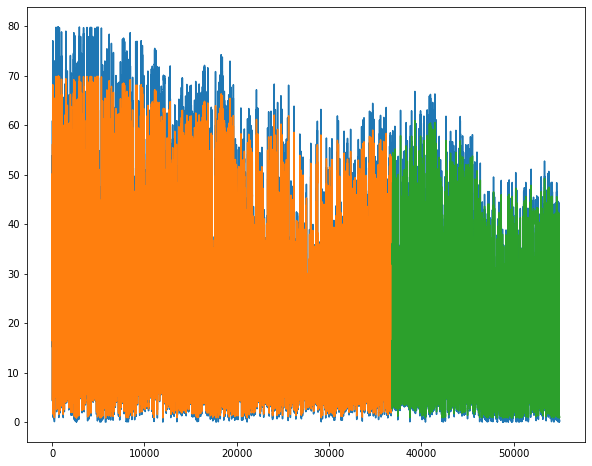

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
model

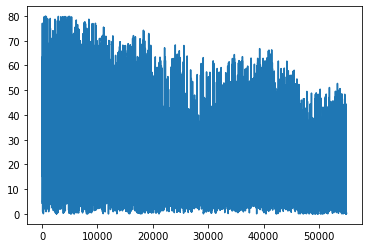

In [14]:
datosp = pd.read_csv('DatosFinales.csv')['Potencia [kW]']
plt.plot(datosp)

In [15]:
from keras.models import load_model, save_model
model.save('modelo1.h5')

In [18]:
modelocarga = load_model('modelo1.h5')
modelocarga.

In [29]:
# make predictions
trainPredict = modelocarga.predict(trainX)
testPredict = modelocarga.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.29 RMSE
Test Score: 6.07 RMSE
